In [56]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [57]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

In [58]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

# 1. 데이터 준비

In [59]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")
print(type(iris))
print(iris)

<class 'pandas.core.frame.DataFrame'>
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     set

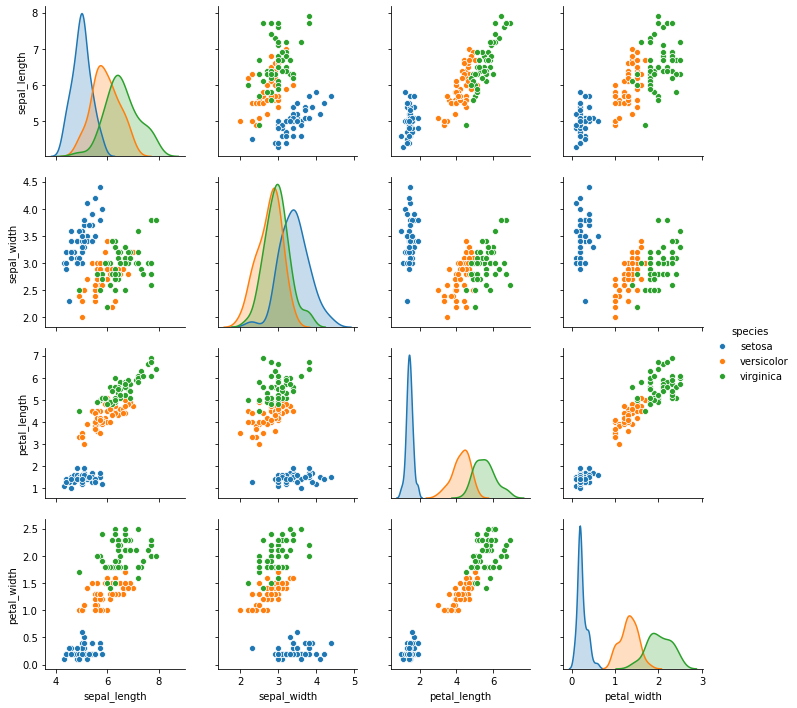

In [60]:
sns.pairplot(iris, hue="species")

In [61]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [62]:
X = iris.iloc[:,0:4].values
print(X)

print()

y = iris.iloc[:,4].values
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# 2. 데이터 전처리

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

Y = pd.get_dummies(y1).values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


# 3. 네트워크 정의 + 컴파일

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습

In [67]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/sample - loss: 0.9503 - acc: 0.3750 - val_loss: 1.1079 - val_acc: 0.2333
Epoch 2/100
120/120 [==============================] - 0s 208us/sample - loss: 0.9085 - acc: 0.4000 - val_loss: 1.0584 - val_acc: 0.3333
Epoch 3/100
120/120 [==============================] - 0s 183us/sample - loss: 0.8759 - acc: 0.4500 - val_loss: 1.0115 - val_acc: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 216us/sample - loss: 0.8422 - acc: 0.6000 - val_loss: 0.9699 - val_acc: 0.5000
Epoch 5/100
120/120 [==============================] - 0s 199us/sample - loss: 0.8155 - acc: 0.6917 - val_loss: 0.9317 - val_acc: 0.5333
Epoch 6/100
120/120 [==============================] - 0s 191us/sample - loss: 0.7897 - acc: 0.6917 - val_loss: 0.8977 - val_acc: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 191us/sample - loss: 0.7693 - acc: 0.6917 - val_loss: 0.8679 - val_acc: 0.566

# 5. 학습 과정 확인

In [68]:
hist.history

{'loss': [0.9502944827079773,
  0.9085483193397522,
  0.8759106040000916,
  0.8422052502632141,
  0.8155000646909077,
  0.7896709720293681,
  0.7693041523297628,
  0.7484188357988993,
  0.7306671182314555,
  0.7157051602999369,
  0.7035782774289449,
  0.6913295110066732,
  0.6813687165578206,
  0.6728670875231425,
  0.6651491284370422,
  0.6580771724383037,
  0.6518773754437764,
  0.6459929426511128,
  0.640261709690094,
  0.6351095080375672,
  0.629859999815623,
  0.6249092380205791,
  0.619602620601654,
  0.6147059559822082,
  0.6099535663922627,
  0.6052054405212403,
  0.6006075421969096,
  0.5960883021354675,
  0.591594684123993,
  0.5872125307718913,
  0.5829280217488607,
  0.5786831498146057,
  0.574407700697581,
  0.5702334721883138,
  0.5661241571108501,
  0.5618897159894307,
  0.5579077521959941,
  0.5539541363716125,
  0.5498853961626688,
  0.5461070557435354,
  0.5422864298025767,
  0.5383699615796407,
  0.5349285483360291,
  0.5309804280598959,
  0.5274875899155934,
  0.523

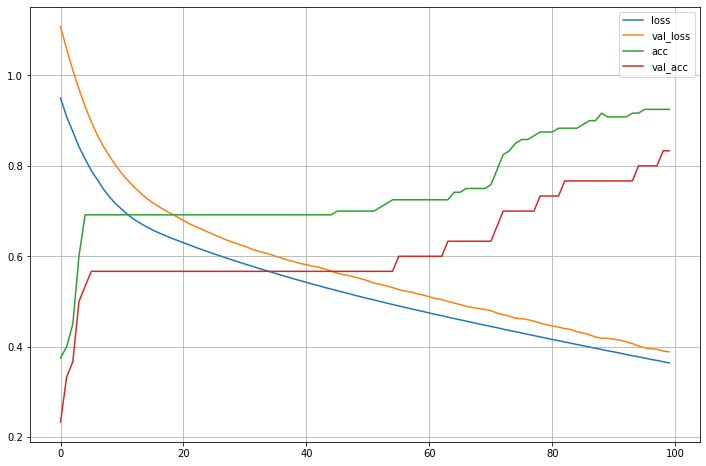

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

# 6. 분류 결과 분석

In [70]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



In [71]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [72]:
y_pred

array([[2.2931041e-03, 2.7491403e-01, 7.2279286e-01],
       [5.5538602e-02, 5.2670401e-01, 4.1775739e-01],
       [9.7292084e-01, 2.6357306e-02, 7.2181481e-04],
       [9.2817447e-04, 2.3672615e-01, 7.6234567e-01],
       [9.4671023e-01, 5.0899625e-02, 2.3901635e-03],
       [8.9736620e-04, 2.4031068e-01, 7.5879192e-01],
       [9.5908266e-01, 3.9318521e-02, 1.5987903e-03],
       [3.2279465e-02, 5.2896219e-01, 4.3875831e-01],
       [2.3155654e-02, 4.8905244e-01, 4.8779187e-01],
       [7.9315260e-02, 5.7230043e-01, 3.4838435e-01],
       [2.0199763e-03, 2.7603775e-01, 7.2194231e-01],
       [4.2834446e-02, 5.5244362e-01, 4.0472195e-01],
       [1.9211488e-02, 4.6718535e-01, 5.1360321e-01],
       [2.6321048e-02, 4.9537295e-01, 4.7830591e-01],
       [1.8069753e-02, 4.6385863e-01, 5.1807165e-01],
       [9.5399243e-01, 4.4155929e-02, 1.8516971e-03],
       [2.4149830e-02, 4.8690376e-01, 4.8894641e-01],
       [1.9277686e-02, 4.5136562e-01, 5.2935672e-01],
       [9.3101001e-01, 6.509

In [73]:
cm = confusion_matrix(y_test_class, y_pred_class) # 가로-세로 축 유의
print(cm)

[[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]


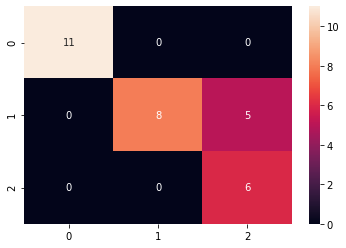

In [74]:
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')